In [1]:
import os
os.chdir('/home/roobz/Jupyter/afib-detector/src/')

In [2]:
import pandas as pd
import numpy as np
from wfdb_ext import Record
import wfdb, glob
from utils import convert_notebook

%load_ext autoreload
%autoreload 2

## Issues:
 - Model does validation does not improve
 - Add fold column(s) to split_map
 - Expand dataset into individual samples wtih 50% overlap

In [91]:
Afib_CNN_sum = summary(Afib_CNN(channels=2, repeat_layers=0), input_size=(1,2,2500), dtypes=[torch.float32])
Afib_CNN_sum

Layer (type:depth-idx)                   Output Shape              Param #
Afib_CNN                                 --                        --
├─Sequential: 1-1                        [1, 512, 76]              --
│    └─ConvBlock: 2-1                    [1, 32, 1248]             --
│    │    └─Sequential: 3-1              [1, 32, 1248]             352
│    └─ConvBlock: 2-2                    [1, 64, 622]              --
│    │    └─Sequential: 3-2              [1, 64, 622]              10,304
│    └─ConvBlock: 2-3                    [1, 128, 309]             --
│    │    └─Sequential: 3-3              [1, 128, 309]             41,088
│    └─ConvBlock: 2-4                    [1, 512, 152]             --
│    │    └─Sequential: 3-4              [1, 512, 152]             328,192
│    └─Conv1d: 2-5                       [1, 512, 152]             262,656
│    └─MaxPool1d: 2-6                    [1, 512, 76]              --
│    └─ReLU: 2-7                         [1, 512, 76]             

In [8]:
from scipy import fft, signal
import matplotlib.pyplot as plt

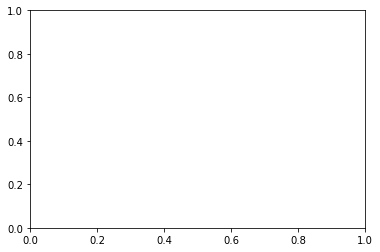

In [7]:
ax = plt.axes()
ax.pcolormesh

In [14]:
def plot_spectrogram(x, fs, xlabel=None, ylabel=None, ax=None):
    if ax is None:
        ax = plt.axes()
    
    f, t, Sxx = signal.spectrogram(x, fs)
    ax.pcolormesh(t, fft.fftshift(f), fft.fftshift(Sxx, axes=0), shading='gouraud')
    
    if xlabel is not None:
        ax.xlabel(xlabel)
    if ylabel is not None:
        ax.ylabel(ylabel)
    
    return ax
    
        
    
def plot_ecg_dft(p_signal, fs, figsize=None, suptitle=None):
    n_sample_fft = pd.DataFrame(np.abs(fft.rfft(p_signal, axis=0, norm='ortho')), columns=['ECG1', 'ECG2'])
    n_sample_fft.index = fft.rfftfreq(p_signal.shape[0], d=1./fs)
    n_sample_fft = n_sample_fft[n_sample_fft.index>0]
    
    fig, axes = plt.subplots(2, figsize=figsize)
    plot_dft(n_sample_fft.ECG1, ax=axes[0])
    plot_dft(n_sample_fft.ECG2, x_label='Freq. (Hz)', ax=axes[1])
    fig.suptitle(suptitle)
    return fig

In [16]:
from wfdb_ext import Record

In [36]:
signal.spectrogram?

Signature:
signal.spectrogram(
    x,
    fs=1.0,
    window=('tukey', 0.25),
    nperseg=None,
    noverlap=None,
    nfft=None,
    detrend='constant',
    return_onesided=True,
    scaling='density',
    axis=-1,
    mode='psd',
)
Docstring:
Compute a spectrogram with consecutive Fourier transforms.

Spectrograms can be used as a way of visualizing the change of a
nonstationary signal's frequency content over time.

Parameters
----------
x : array_like
    Time series of measurement values
fs : float, optional
    Sampling frequency of the `x` time series. Defaults to 1.0.
window : str or tuple or array_like, optional
    Desired window to use. If `window` is a string or tuple, it is
    passed to `get_window` to generate the window values, which are
    DFT-even by default. See `get_window` for a list of windows and
    required parameters. If `window` is array_like it will be used
    directly as the window and its length must be nperseg.
    Defaults to a Tukey window with shape 

In [48]:
ax.set_ylim?

Signature:
ax.set_ylim(
    bottom=None,
    top=None,
    emit=True,
    auto=False,
    *,
    ymin=None,
    ymax=None,
)
Docstring:
Set the y-axis view limits.

Parameters
----------
bottom : float, optional
    The bottom ylim in data coordinates. Passing *None* leaves the
    limit unchanged.

    The bottom and top ylims may also be passed as the tuple
    (*bottom*, *top*) as the first positional argument (or as
    the *bottom* keyword argument).

    .. ACCEPTS: (bottom: float, top: float)

top : float, optional
    The top ylim in data coordinates. Passing *None* leaves the
    limit unchanged.

emit : bool, default: True
    Whether to notify observers of limit change.

auto : bool or None, default: False
    Whether to turn on autoscaling of the y-axis. *True* turns on,
    *False* turns off, *None* leaves unchanged.

ymin, ymax : float, optional
    They are equivalent to bottom and top respectively,
    and it is an error to pass both *ymin* and *bottom* or
    *ymax* an

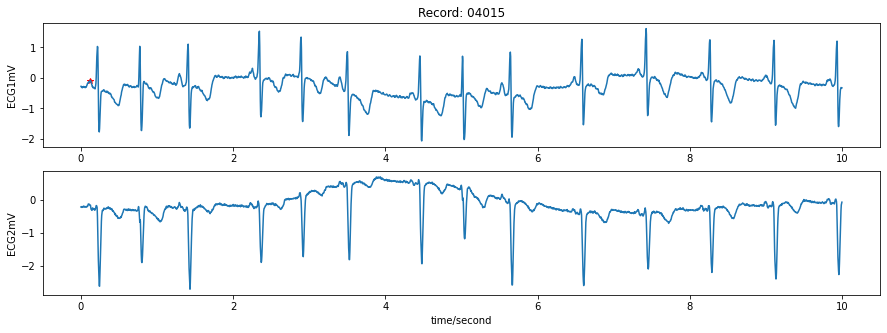

In [55]:
Record('../data/physionet/afdb/04015', sampfrom=0, sampto=2500).plot(figsize=(15,5), time_units='seconds')

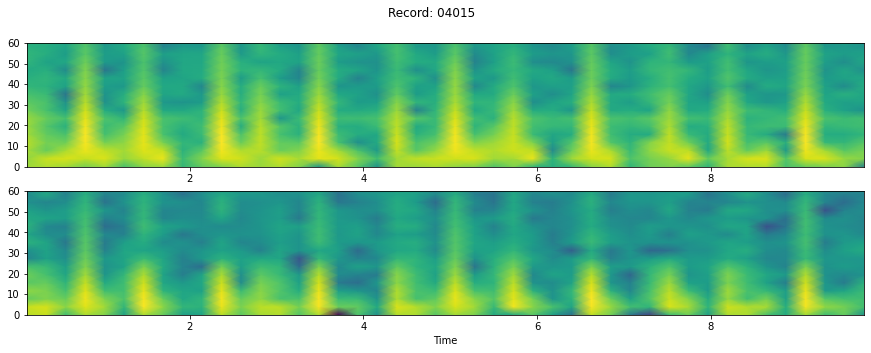

In [76]:
Record('../data/physionet/afdb/04015', sampfrom=0, sampto=2500).plot_spectrograms(figsize=(15,5))

In [28]:
ecg1, ecg2 = Record('../data/physionet/afdb/04015', sampfrom=0, sampto=100).p_signal.T

In [29]:
ecg1

array([-0.275, -0.295, -0.31 , -0.315, -0.3  , -0.32 , -0.3  , -0.3  ,
       -0.29 , -0.28 , -0.295, -0.29 , -0.305, -0.315, -0.32 , -0.295,
       -0.295, -0.305, -0.275, -0.25 , -0.23 , -0.19 , -0.175, -0.165,
       -0.17 , -0.14 , -0.145, -0.12 , -0.12 , -0.11 , -0.115, -0.09 ,
       -0.1  , -0.13 , -0.16 , -0.215, -0.23 , -0.285, -0.28 , -0.32 ,
       -0.31 , -0.31 , -0.32 , -0.34 , -0.335, -0.34 , -0.36 , -0.31 ,
       -0.26 , -0.18 ,  0.03 ,  0.35 ,  0.695,  0.86 ,  1.03 ,  0.995,
        0.42 , -0.58 , -1.345, -1.695, -1.77 , -1.65 , -1.375, -1.   ,
       -0.74 , -0.595, -0.495, -0.445, -0.44 , -0.435, -0.44 , -0.43 ,
       -0.425, -0.41 , -0.39 , -0.415, -0.425, -0.405, -0.445, -0.445,
       -0.455, -0.46 , -0.465, -0.475, -0.455, -0.43 , -0.45 , -0.47 ,
       -0.45 , -0.46 , -0.5  , -0.5  , -0.51 , -0.505, -0.52 , -0.5  ,
       -0.52 , -0.525, -0.53 , -0.56 ])

In [12]:
np.random.rand(2500)

array([0.24114991, 0.98697934, 0.46015775, ..., 0.55009657, 0.46443983,
       0.10435586])

<AxesSubplot:>

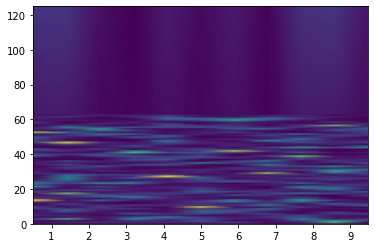

In [15]:
plot_spectrogram(np.random.rand(2500), 250)

In [2]:
from utils import convert_notebook

In [6]:
convert_notebook('../blog/Blog.ipynb', '../blog/index.html')

Task exception was never retrieved
future: <Task finished name='Task-57' coro=<NotebookClient._async_cleanup_kernel() done, defined at /home/roobz/anaconda3/lib/python3.8/site-packages/nbclient/client.py:363> exception=AttributeError("'NoneType' object has no attribute 'cleanup_resources'")>
Traceback (most recent call last):
  File "/home/roobz/anaconda3/lib/python3.8/asyncio/tasks.py", line 280, in __step
    result = coro.send(None)
  File "/home/roobz/anaconda3/lib/python3.8/site-packages/nbclient/client.py", line 376, in _async_cleanup_kernel
    await ensure_async(self.km.cleanup_resources())
AttributeError: 'NoneType' object has no attribute 'cleanup_resources'
/home/roobz/anaconda3/lib/python3.8/site-packages/nbconvert/filters/datatypefilter.py:39: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn("Your element with mimetype(s) {mimetypes}"
/home/roobz/anaconda3/lib/python3.8/site-packages/nbconvert/filters/datatypefilter.

In [11]:
blog_md_path = '../blog/Blog.md' 
with open('../blog/Blog.md', 'r', encoding='UTF-8') as blog_md:
    num = 1
    for line in blog_md.readlines():
        print(line.encode('utf-8'))

b'---\n'
b'layout: page\n'
b'title: AFib Detection\n'
b'permalink: /\n'
b'---\n'
b'\n'
b'# Detecting Atrial Fibrilation with 1-D CNNs\n'
b'\n'
b'So I recently bought an Apple Watch. It was on sale for a pretty good deal and I\xe2\x80\x99ve been wanting one for quite a while, so I just had to get it. Like I normally do with all of my recently purchased gadgets, I played around with it in the middle of the night to figure out all of its features. This led to me discovering the ECG feature which intrigued me, so I set out to recreate a similar system to detect Atrial Fibrillation (AFib) like Apple\xe2\x80\x99s implementation does. \n'
b'\n'
b'The thing is, I had no prior experience with ECGs. Most of what I know is focused around computers, so the biomedical domain isn\xe2\x80\x99t really my specialty. However, I thought this project would serve as a good exploration into the domain.\n'
b'\n'
b'**TLDR;** I got an Apple Watch. It can do ECGs. I wanted to replicate that and learn more about